In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels
from scipy.stats import t, shapiro
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
# Chargement du df
df_billet = pd.read_csv(r"C:\Users\franc\OneDrive\Documents\OpenClassrooms\Projet 10\dataset_billet.csv", sep=';')

In [3]:
df_billet.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


In [4]:
# On renomme les colonnes en français
df_billet.rename(columns={'length': 'longueur', 'height_left': 'hauteur_gauche', 'height_right': 'hauteur_droite', 
                          'diagonal': 'diagonale', 'is_genuine': 'authenticité', 'margin_up': 'marge_superieure',
                          'margin_low': 'marge_inferieure'}, inplace=True)

In [5]:
# Vérification des valeurs vides
df_billet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   authenticité      1500 non-null   bool   
 1   diagonale         1500 non-null   float64
 2   hauteur_gauche    1500 non-null   float64
 3   hauteur_droite    1500 non-null   float64
 4   marge_inferieure  1463 non-null   float64
 5   marge_superieure  1500 non-null   float64
 6   longueur          1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


#### Il manque 37 valeurs sur la colonne "marge_inferieure", nous allons utiliser une régression linéaire pour déterminer les valeurs vides.

# Regréssion linéaire multiple

https://openclassrooms.com/fr/courses/4525326-realisez-des-modelisations-de-donnees-performantes/5754144-selectionnez-automatiquement-un-modele

### Procédure descendante ou backward

In [32]:
# On supprimme les lignes vides
df_billet_RegLin = df_billet.dropna()
df_billet_RegLin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   authenticité      1500 non-null   bool   
 1   diagonale         1500 non-null   float64
 2   hauteur_gauche    1500 non-null   float64
 3   hauteur_droite    1500 non-null   float64
 4   marge_superieure  1500 non-null   float64
 5   longueur          1500 non-null   float64
 6   marge_inferieure  1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 83.5 KB


In [7]:
import statsmodels.formula.api as smf
reg_multi = smf.ols('marge_inferieure~authenticité+diagonale+hauteur_gauche+hauteur_droite+marge_superieure+longueur', data=df_billet_RegLin).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:       marge_inferieure   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     390.7
Date:                Sat, 18 Mar 2023   Prob (F-statistic):          4.75e-299
Time:                        16:28:33   Log-Likelihood:                -774.14
No. Observations:                1463   AIC:                             1562.
Df Residuals:                    1456   BIC:                             1599.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                2.8668 

On constate ici que certains paramètres ne sont pas significatifs, ils ont des P-valeurs > 5%, c'est le cas de:
- longueur
- diagonale

### Retirez les variables non significatives
On va donc maintenant retirer les variables non significatives. On commence par la moins significative : la longueur, car elle a une p-valeur de 0.87.

In [8]:
reg_multi = smf.ols('marge_inferieure~authenticité+diagonale+hauteur_gauche+hauteur_droite+marge_superieure', data=df_billet_RegLin).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:       marge_inferieure   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     469.2
Date:                Sat, 18 Mar 2023   Prob (F-statistic):          2.12e-300
Time:                        16:28:33   Log-Likelihood:                -774.15
No. Observations:                1463   AIC:                             1560.
Df Residuals:                    1457   BIC:                             1592.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                2.4247 

On voit alors que c'est maintenant la diagonale, avec une p-valeur de 0.72, qui est la moins significative. On l'enlève donc.

In [9]:
reg_multi = smf.ols('marge_inferieure~authenticité+hauteur_gauche+hauteur_droite+marge_superieure', data=df_billet_RegLin).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:       marge_inferieure   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     586.8
Date:                Sat, 18 Mar 2023   Prob (F-statistic):          8.76e-302
Time:                        16:28:33   Log-Likelihood:                -774.21
No. Observations:                1463   AIC:                             1558.
Df Residuals:                    1458   BIC:                             1585.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.3902 

L'ensemble des paramètres sont désormais significatifs, ils ont une P-valeur < 5%. Nous allons donc garder uniquement ces variables pour effectuer notre régression linéaire.

Le R2 permet d'évaluer la qualité de la regression linéaire
- R2 = 0.62

Ce n'est pas un score élevé, néanmoins c'est le plus optimal en fonction des paramètres que nous avons.

In [10]:
# Création d'un df avec seulement les billets avec des valeurs de marge_inferieure vides
df_billet_vide = df_billet[df_billet.isnull().any(1)]
df_billet_vide = df_billet_vide.drop(['diagonale', 'marge_inferieure', 'longueur'], axis=1)
df_billet_vide.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37 entries, 72 to 1438
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   authenticité      37 non-null     bool   
 1   hauteur_gauche    37 non-null     float64
 2   hauteur_droite    37 non-null     float64
 3   marge_superieure  37 non-null     float64
dtypes: bool(1), float64(3)
memory usage: 1.2 KB


In [11]:
previsions = reg_multi.predict(df_billet_vide)

In [12]:
# Récupération des valeurs dans un nouveau df
df_prev = pd.DataFrame(previsions, columns = ['marge_inferieure'], index = df_billet_vide.index)
df_prev.head()

,marge_inferieure
72,4.062968
99,4.110282
151,4.133718
197,3.986831
241,4.134682


## Analyse des résultats
https://sites.google.com/view/aide-python/statistiques/machine-learning-en-python/régressions-linéaires-en-python

### Colinéarité des variables
Deux variables sont dites colinéaires lorsqu'elles sont linéairement dépendantes l'une de l'autre. Concrètement, on pourra dire que deux variables sont colinéaires dès l'instant où la corrélation entre les deux est statistiquement significative.

In [13]:
variables = reg_multi.model.exog
[variance_inflation_factor(variables, i) for i in np.arange(1,variables.shape[1])]

[2.0169300419915985,
 1.1677552361727697,
 1.3170647998608134,
 1.5948609285174227]

Ici, tous les coefficients sont inférieurs à 10, il n'y a donc pas de problème de colinéarité sur les 4 variables.

### Test d'homoscedasticité des résidus
On appelle homscédasticité l'égalité ou constance de la variance d'une variable. Lorsque la variance diffère selon les échantillons, on parle alors d'hétéroscédasticité.

In [14]:
_, pval, __, f_pval = statsmodels.stats.diagnostic.het_breuschpagan(reg_multi.resid, variables)
print('p value test Breusch Pagan:', pval)

p value test Breusch Pagan: 1.889569089071077e-34


La p-valeur ici est inférieure à $5$%, on rejette donc l'hypothèse $H0$ selon laquelle les variances sont constantes. On est donc ici dans un cas d'hétéroscédasticité.

### Test de normalité des résidus

In [15]:
import math
# Récupération des résidus
residues = reg_multi.resid_pearson

# Normalisation des résidus
residues_std = residues/math.sqrt(sum(residues**2)/(len(residues)-1))

#### Contrôle graphique par histogramme et QQ-plot

Text(0.5, 0, 'Normalized residuals')

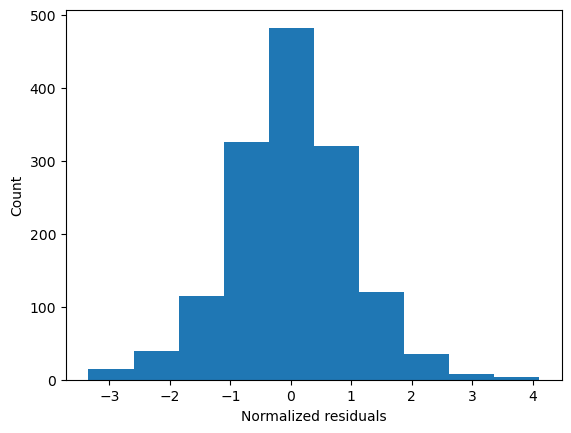

In [16]:
plt.hist(residues_std)
plt.ylabel('Count')
plt.xlabel('Normalized residuals')

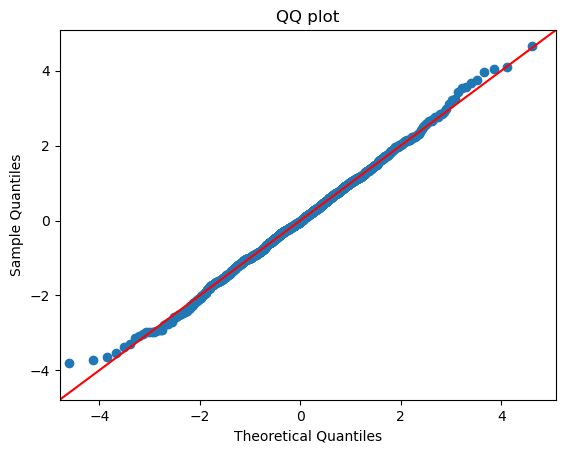

In [17]:
import statsmodels.api as sm
import scipy.stats as stats
fig = sm.qqplot(residues_std, stats.t, fit=True,line='45')
plt.title("QQ plot")
plt.show()

Ces 2 graphiques nous permettent de dire que les résidus sont répartis selon une loi normale

#### Contrôle par un test statistique
Nous utiliserons le test de Jarque-Berra, adapté aux grands échantillons (>50). (si échantillon <50 alors test de Shapiro-Wilk)

Il nous permet de contrôler l'hypothèse nulle d'une répartition normale. Si p-value > 0.05 <-> Normalité.

#### Test de Jarque-Berra

In [18]:
from scipy.stats import jarque_bera
x, pval = jarque_bera(residues_std) ; print(pval)

3.6823935012364473e-09


Nous constatons ici que la p-value est < 0.05, ce qui contredit notre analyse graphique.

#### Grâce à l'observation des résidus, le fait qu'ils soient proche d'une distribution normale, et le fait que l'échantillon soit de taille suffisante (supérieure à 30) permettent de dire que les résultats obtenus par le modèle linéaire gaussien ne sont pas absurdes.

## Ajout des valeurs manquantes sur le df_final

In [19]:
df_billet.head()

,authenticité,diagonale,hauteur_gauche,hauteur_droite,marge_inferieure,marge_superieure,longueur
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


In [20]:
# Jointure du df_prev sur le df_billet (sur l'index)
df_billet = df_billet.merge(df_prev, how = 'outer', left_index=True, right_index=True)
df_billet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   authenticité        1500 non-null   bool   
 1   diagonale           1500 non-null   float64
 2   hauteur_gauche      1500 non-null   float64
 3   hauteur_droite      1500 non-null   float64
 4   marge_inferieure_x  1463 non-null   float64
 5   marge_superieure    1500 non-null   float64
 6   longueur            1500 non-null   float64
 7   marge_inferieure_y  37 non-null     float64
dtypes: bool(1), float64(7)
memory usage: 95.2 KB


In [21]:
# Changement du type des colonnes pour pouvoir les combiner x et y
df_billet['marge_inferieure_x'] = df_billet['marge_inferieure_x'].astype('str')
df_billet['marge_inferieure_y'] = df_billet['marge_inferieure_y'].astype('str')

# Suppression des valeurs nan
df_billet = df_billet.replace(to_replace="nan", value="")

# Cocaténation des 2 colonnes de marge_inférieure temporaires pour combler les valeurs vides
df_billet['marge_inferieure'] = df_billet['marge_inferieure_x'] + df_billet['marge_inferieure_y']

# Suppression des colonnes inutiles
df_billet = df_billet.drop(['marge_inferieure_x', 'marge_inferieure_y'], axis=1)

# Changer le type des colonnes
df_billet['marge_inferieure'] = df_billet['marge_inferieure'].astype('float')
df_billet.head()

,authenticité,diagonale,hauteur_gauche,hauteur_droite,marge_superieure,longueur,marge_inferieure
0,True,171.81,104.86,104.95,2.89,112.83,4.52
1,True,171.46,103.36,103.66,2.99,113.09,3.77
2,True,172.69,104.48,103.50,2.94,113.16,4.40
3,True,171.36,103.91,103.94,3.01,113.51,3.62
4,True,171.73,104.28,103.46,3.48,112.54,4.04


In [22]:
df_billet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   authenticité      1500 non-null   bool   
 1   diagonale         1500 non-null   float64
 2   hauteur_gauche    1500 non-null   float64
 3   hauteur_droite    1500 non-null   float64
 4   marge_superieure  1500 non-null   float64
 5   longueur          1500 non-null   float64
 6   marge_inferieure  1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 83.5 KB


In [23]:
# Extraction du df_final en fichier csv
df_billet.to_csv(r"C:\Users\franc\OneDrive\Documents\OpenClassrooms\Projet 10\df_billet_complet.csv")

In [24]:
# Suppression de la colonne authenticité --> df numérique
df_billet1 = df_billet.drop(['authenticité'], axis=1)

# Analyse descriptive des données

In [25]:
# Vérification du nombre de billers vrai/faux
df_billet["authenticité"].value_counts()

True     1000
False     500
Name: authenticité, dtype: int64

#### Diagonale

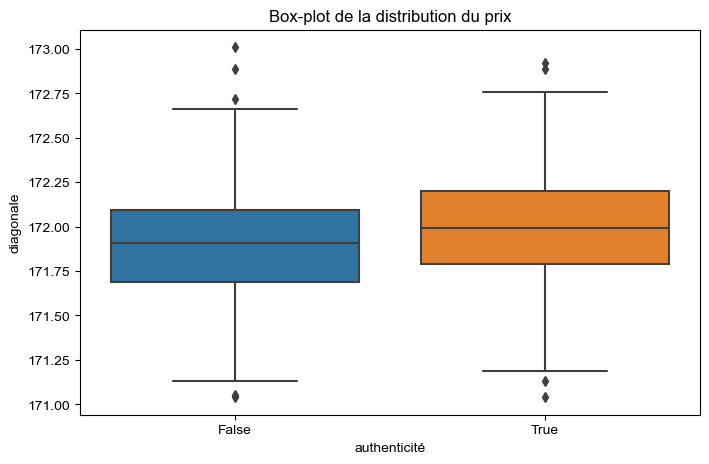

In [26]:
plt.figure(figsize=(8, 5))
plt.title("Box-plot de la distribution du prix")
sns.set_style("whitegrid")
ax = sns.boxplot(x= df_billet["authenticité"], y =df_billet["diagonale"])
plt.show()

#### hauteur_gauche

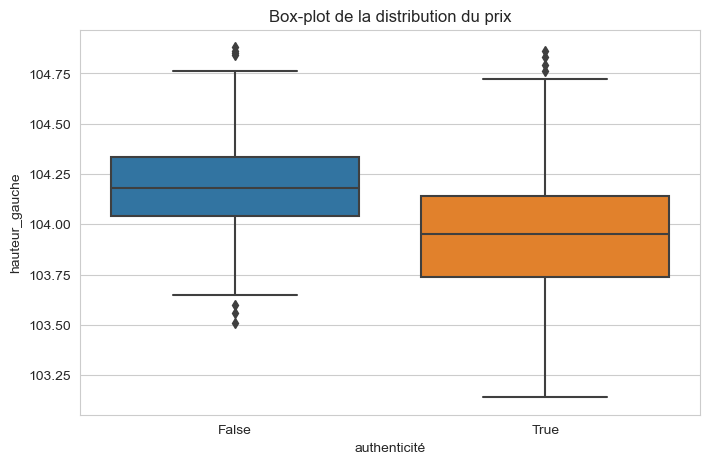

In [27]:
plt.figure(figsize=(8, 5))
plt.title("Box-plot de la distribution du prix")
sns.set_style("whitegrid")
ax = sns.boxplot(x= df_billet["authenticité"], y =df_billet["hauteur_gauche"])
plt.show()

#### hauteur_droite

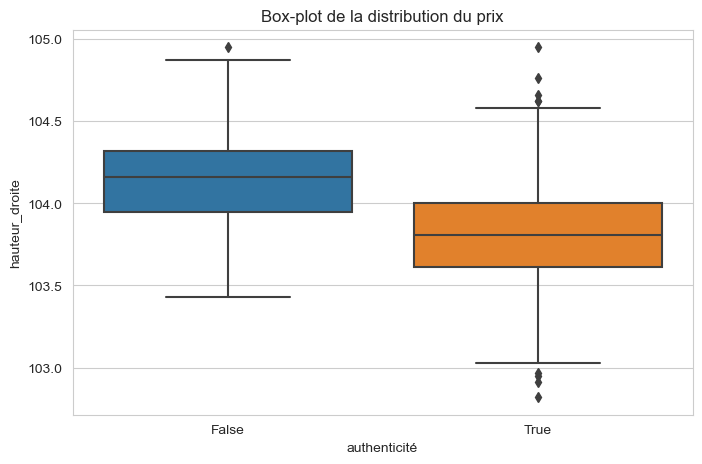

In [28]:
plt.figure(figsize=(8, 5))
plt.title("Box-plot de la distribution du prix")
sns.set_style("whitegrid")
ax = sns.boxplot(x= df_billet["authenticité"], y =df_billet["hauteur_droite"])
plt.show()

#### marge_superieure

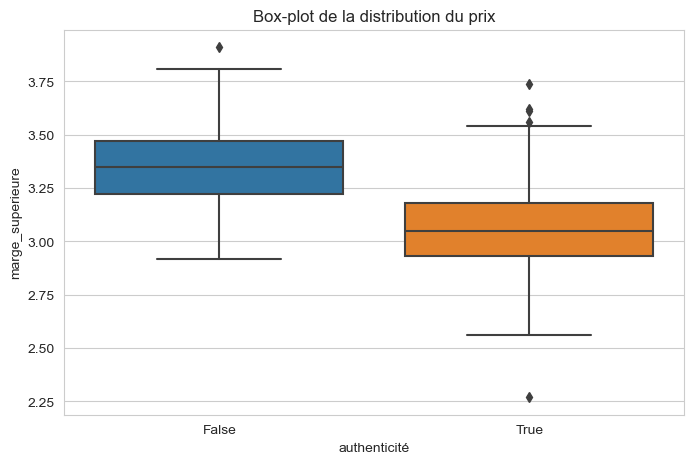

In [29]:
plt.figure(figsize=(8, 5))
plt.title("Box-plot de la distribution du prix")
sns.set_style("whitegrid")
ax = sns.boxplot(x= df_billet["authenticité"], y =df_billet["marge_superieure"])
plt.show()

#### longueur

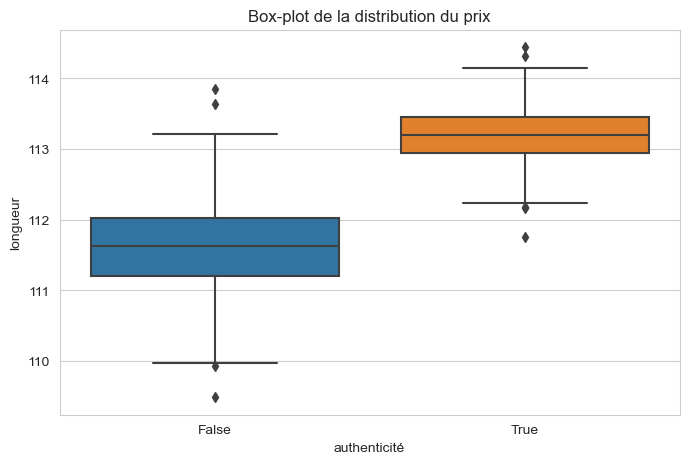

In [30]:
plt.figure(figsize=(8, 5))
plt.title("Box-plot de la distribution du prix")
sns.set_style("whitegrid")
ax = sns.boxplot(x= df_billet["authenticité"], y =df_billet["longueur"])
plt.show()

#### marge_inferieure

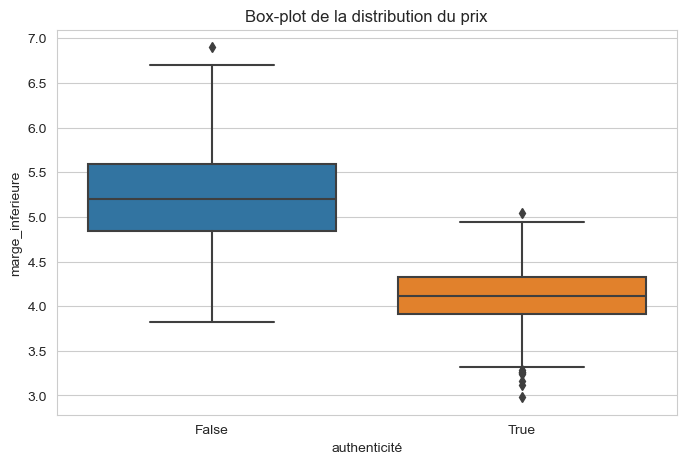

In [31]:
plt.figure(figsize=(8, 5))
plt.title("Box-plot de la distribution du prix")
sns.set_style("whitegrid")
ax = sns.boxplot(x= df_billet["authenticité"], y =df_billet["marge_inferieure"])
plt.show()

## Conclusion de l'analyse descriptive
Sur un set de 1500 billets, nous avons:
#### - 1000 vrais billets
#### - 500 faux billets

En moyenne, l'ensemble des faux billets possède des dimensions supérieures à celles des vrais billets, excepté pour la longueur.

On remarque également que la différence la plus importante entre les vrais et faux billets se fait sur la longueur et la marge inférieure.

Au vu de la dissimilarité des valeurs, on peut donc s'attendre à ce que les dimensions:
- longueur, marge inférieure, marge supérieure permettent de différencier le plus efficacement les billets.

Les autres dimensions seront moins pertinentes pour cette différenciation.

## Nous allons maintenant utiliser ce dataset à des fins de prédictions. Nous utiliseroins pour cela 2 méthodes de machine learning:
### - La regression logistique
### - Les Kmeans